In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비

In [2]:
df_iris = pd.read_csv('data/iris.csv').iloc[:,1:]
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 데이터 전처리

In [3]:
# ----------------
# target 인코딩
# ----------------
class_names = {'Iris-setosa':0,
               'Iris-versicolor':1,
               'Iris-virginica':2}
# df_iris['target'] = 
df_iris['target'] = df_iris['Species'].map(class_names)
df_iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
126,6.2,2.8,4.8,1.8,Iris-virginica,2
42,4.4,3.2,1.3,0.2,Iris-setosa,0
130,7.4,2.8,6.1,1.9,Iris-virginica,2
34,4.9,3.1,1.5,0.1,Iris-setosa,0
60,5.0,2.0,3.5,1.0,Iris-versicolor,1


#### 데이터 선택

In [4]:
# ----------------
# X, y
# ----------------
X = df_iris.drop(['Species', 'target'], axis=1)
y = df_iris['target']

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 학습용 데이터와 테스트용 데이터 분할

In [5]:
# ----------------
# 균등분할
#   stratify
# ----------------

from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.2
                                                    , random_state=42
                                                    , stratify=y)

# 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [6]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

target
0    40
2    40
1    40
Name: count, dtype: int64
target
0    10
2    10
1    10
Name: count, dtype: int64


#### 모델 생성 및 학습

In [19]:
# ---------------------------------------
# DecisionTreeClassifier 모델 생성
# ---------------------------------------

from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier()

# ---------------------------------------
# 모델 학습
# ---------------------------------------

model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 모델 평가

In [20]:
# ---------------------------------------
# 테스트용 데이터로 예측 
# ---------------------------------------

y_pred = model.predict(X_test)

print('예측값 : ', y_pred)
print('실제값 : ', np.array(y_test))

예측값 :  [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]
실제값 :  [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [21]:
# ---------------------------------------
# 정확도 평가
# ---------------------------------------

test_accuracy = model.score(X_test, y_test)
train_accuracy = model.score(X_train, y_train)

print(f'테스트 accuracy : {test_accuracy}')
print(f'훈련 accuracy : {train_accuracy}')

테스트 accuracy : 0.9666666666666667
훈련 accuracy : 1.0


In [22]:
# ---------------------------------------
# 분류 모델의 평가지표 리포트
#   support : 해당 클래스의 표본 수
#   macro avg : 클래스 별 지표의 단순 평균
#   weighted avg 
#       클래스별 지표(precision‧recall‧f1-score)를 해당 클래스의 샘플 수(support)로 가중평균한 값
#       데이터 불균형이 있을 때 전체 모델 성능을 현실적으로 보여준다
#       weighted ave 값이 매우 높으면 다수 클래스가 모델 평가의 대부분을 차지한다는 의미
# ---------------------------------------

from sklearn.metrics import precision_score, classification_report

print(classification_report(y_test, y_pred))

print(precision_score(y_test,y_pred, average='micro'))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


#### 분류 모델의 학습 결과

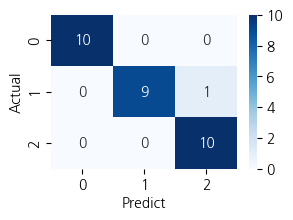

In [23]:
# --------------------------------
# 혼동행렬 (행=실제, 열=예측)
# --------------------------------

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,2))
sns.heatmap(cm, cmap='Blues', annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
pass


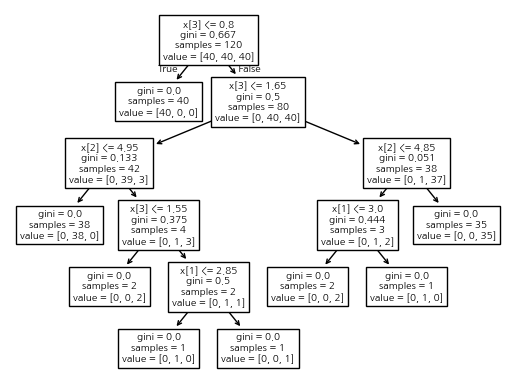

In [24]:
# 트리 시각화

from sklearn.tree import plot_tree

plot_tree(model)
pass

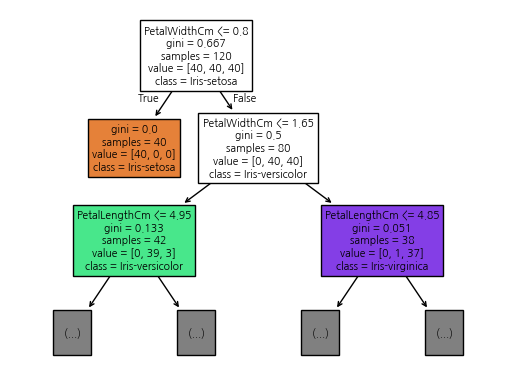

In [25]:
# 트리 시각화

from sklearn.tree import plot_tree

plot_tree(model, max_depth=2, feature_names=X_train.columns, class_names=list(class_names.keys()), filled=True)
pass

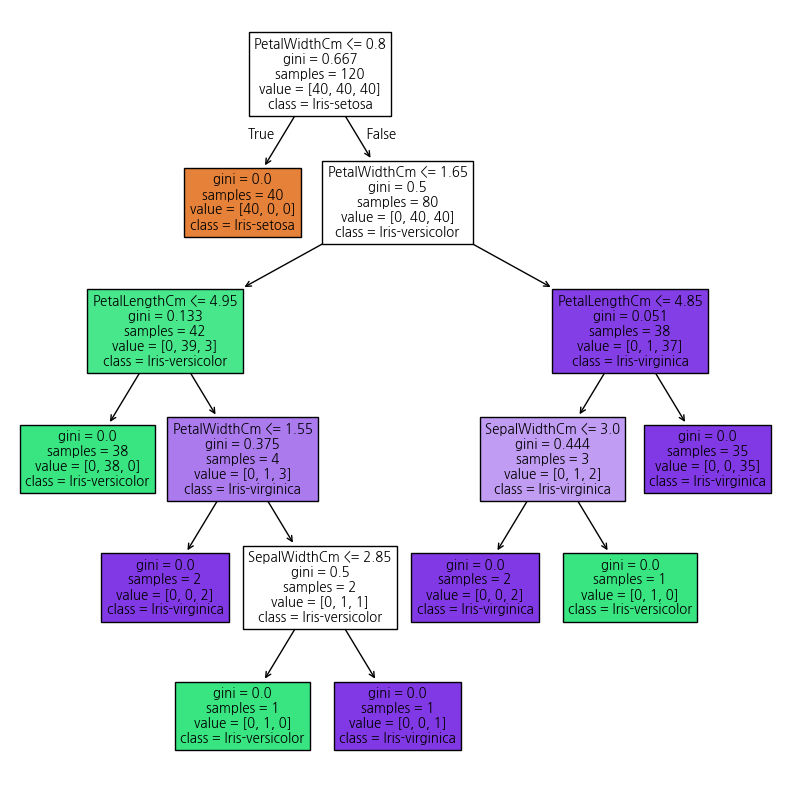

In [26]:
# 트리 시각화

from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(model, feature_names=X_train.columns, class_names=list(class_names.keys()), filled=True)
pass

In [27]:
# --------------------------
# 트리의 깊이
#   get_depth()
# --------------------------

model.get_depth()


5

[0.         0.02916667 0.0585683  0.91226504]


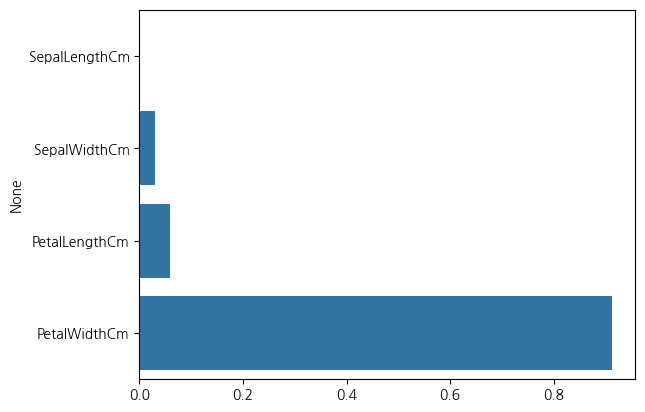

In [28]:
# --------------------------
# 특성의 중요도
# --------------------------

print(model.feature_importances_)

sns.barplot(y=X_train.columns, x=model.feature_importances_)
pass

In [29]:
model.predict_proba([[5.8, 3.1, 5.2, 1.7]])

c:\Users\EL91\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 1.]])